# Exemple de Classification par vote

## Importation des librairies

In [1]:
# Graphes
%matplotlib inline
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Eviter les warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Génération et Affichage des données Breast Cancer
Séparation entre train et test

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

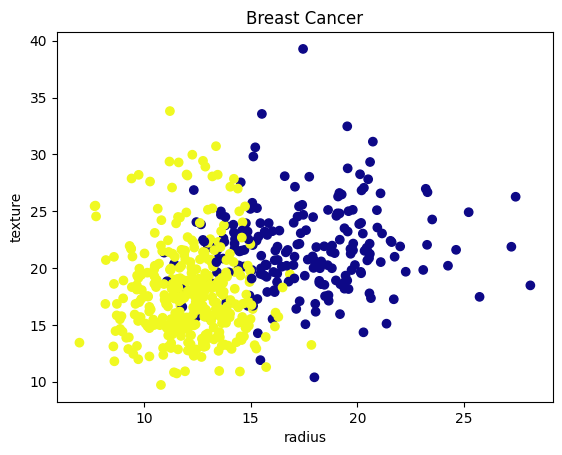

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X[:,0],X[:,1], c = y,cmap='plasma')
plt.xlabel("radius")
plt.ylabel("texture")
plt.title('Breast Cancer')
plt.show()

## Création de 5 modèles différents et d'un système de vote sur les même données

In [4]:
# La régression logistique et le Support Vector nécessitent une normlisation préalable

log_clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=42,max_iter=1000))
tree_clf = DecisionTreeClassifier(max_depth=5)
bayes_clf = GaussianNB()
svr_clf =  make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
perc_clf = make_pipeline(StandardScaler(), Perceptron(random_state=42))

dict_models = {
    'logistic': log_clf,
    'tree': tree_clf,
    'Naive bayes': bayes_clf,
    'support vector': svr_clf,
    'perceptron': perc_clf
    }

estimators=[(name, model) for name, model in dict_models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

## Mise en oeuvre des 5 modèles et du système de vote 'hard'

In [5]:
dict_models['Voting Classifier Hard'] = voting_clf
dict_scores={}
for name, clf in dict_models.items(): #(log_clf, tree_clf, bayes_clf, svr_clf,perc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    dict_scores[name]=round(accuracy_score(y_test, y_pred)*100,3)
dict_scores

{'logistic': 97.902,
 'tree': 95.105,
 'Naive bayes': 95.804,
 'support vector': 97.203,
 'perceptron': 96.503,
 'Voting Classifier Hard': 98.601}

## Mise en oeuvre du vote "soft"

In [6]:
voting_soft_clf = VotingClassifier(estimators=estimators[:4], voting='soft')
voting_soft_clf.fit(X_train, y_train)
y_pred = voting_soft_clf.predict(X_test)
dict_scores['Voting Classifier Soft']=round(accuracy_score(y_test, y_pred)*100, 3)
dict_scores

{'logistic': 97.902,
 'tree': 95.105,
 'Naive bayes': 95.804,
 'support vector': 97.203,
 'perceptron': 96.503,
 'Voting Classifier Hard': 98.601,
 'Voting Classifier Soft': 96.503}

## Stacking

In [9]:
estimators = [
    ('lr', log_clf),
    ('tf', tree_clf),
    ('by', bayes_clf),
    ('sv', svr_clf),
    ('pe', perc_clf)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= GaussianNB()
)
round(clf.fit(X_train, y_train).score(X_test, y_test)*100,3) #alternative à prediction plus calcul du score

97.203